In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copairs import map
from copairs.map.average_precision import p_values
from copairs.matching import assign_reference_index
from notebook_init_utils import bandicoot_check, init_notebook
from numpy.random import rand
from scipy.spatial.distance import cosine

root_dir, in_notebook = init_notebook()
if in_notebook:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

image_base_dir = bandicoot_check(
    pathlib.Path(os.path.expanduser("~/mnt/bandicoot")).resolve(), root_dir
)

In [2]:
def paired_permutation_test(XA: np.array, XB: np.array, n_perm=10000):
    """
    Description
    ----------
    Perform a paired permutation test to assess the significance of the difference
    in similarity (1 - correlation) between two sets of profiles XA and XB.
    Parameters
    ----------
    XA : np.array
        First set of profiles (samples x features).
    XB : np.array
        Second set of profiles (samples x features).
    n_perm : int
        Number of permutations to perform.
    Returns
    -------
    D_obs : float
        Observed mean distance (1 - correlation) between XA and XB.
    pval : float
        P-value from the permutation test.
    """
    # observed distance
    D_obs = np.mean([1 - np.corrcoef(a, b)[0, 1] for a, b in zip(XA, XB)])

    D_perm = np.zeros(n_perm)

    for p in range(n_perm):
        XA_p = XA.copy()
        XB_p = XB.copy()

        swap = rand(XA.shape[0]) < 0.5
        XA_p[swap], XB_p[swap] = XB[swap], XA[swap]

        D_perm[p] = np.mean([1 - np.corrcoef(a, b)[0, 1] for a, b in zip(XA_p, XB_p)])

    pval = (1 + np.sum(D_perm >= D_obs)) / (1 + n_perm)
    return D_obs, pval

In [3]:
organoid_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/organoid_fs_zstep_profiles.parquet"
).resolve()
sc_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/sc_fs_zstep_profiles.parquet"
).resolve()

sc_df = pd.read_parquet(sc_profile_path)
organoid_df = pd.read_parquet(organoid_profile_path)  # replace with organoid path

figure_dir = pathlib.Path(
    f"{root_dir}/7.technical_analysis/figures/zstep_profile_analysis"
).resolve()
figure_dir.mkdir(parents=True, exist_ok=True)

In [4]:
for object_id in sc_df["Metadata_object_id"].unique():
    tmp_df = sc_df[sc_df["Metadata_object_id"] == object_id].copy()

    # setup the mAP
    reference_col = "Metadata_reference_index"
    df_sc_activity = assign_reference_index(
        sc_df,
        "Metadata_zstep == '1'",  # condition to get reference profiles (neg controls)
        reference_col=reference_col,
        default_value=-1,
    )
    # positive pairs are replicates of the same treatment
    pos_sameby = ["Metadata_zstep", reference_col]
    pos_diffby = []

    neg_sameby = []
    # negative pairs are replicates of different treatments
    neg_diffby = ["Metadata_zstep", reference_col]
    metadata = df_sc_activity.filter(regex="^Metadata")
    profiles = df_sc_activity.filter(regex="^(?!Metadata)").values

    activity_sc_ap = map.average_precision(
        metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby
    )
    activity_sc_ap = activity_sc_ap.query("Metadata_zstep != '1'")  # remove DMSO

    activity_map = map.mean_average_precision(
        activity_sc_ap, pos_sameby, null_size=1000000, threshold=0.05, seed=0
    )

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:50: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_338670/1889291220.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


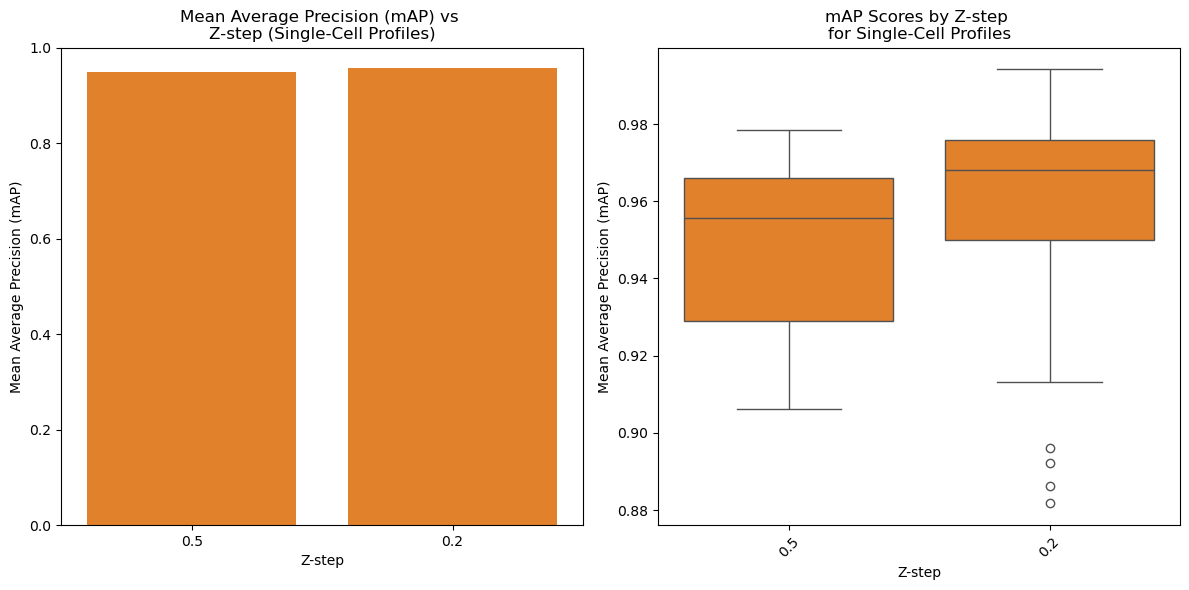

In [5]:
# plot the mAP scores against the convolution values
activity_map["Metadata_zstep"] = activity_map["Metadata_zstep"].astype(str)
activity_sc_ap["Metadata_zstep"] = activity_sc_ap["Metadata_zstep"].astype(str)

# sort z-steps by float value for proper ordering
zstep_order = sorted(
    activity_map["Metadata_zstep"].unique(), key=lambda x: float(x), reverse=True
)

# create custom palette where 0.5 and 0.2 share the same color across both plots
custom_palette = {}
colors = plt.cm.tab10(np.linspace(0, 1, 10))
color_idx = 0
for z in zstep_order:
    if z == "0.5":
        custom_palette[z] = colors[1]
    elif z == "0.2":
        custom_palette[z] = colors[1]  # same as 0.5
    else:
        custom_palette[z] = colors[color_idx]
        color_idx += 1

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(
    data=activity_map,
    x="Metadata_zstep",
    y="mean_average_precision",
    hue="Metadata_zstep",
    palette=custom_palette,
    order=zstep_order,
)
plt.title("Mean Average Precision (mAP) vs \nZ-step (Single-Cell Profiles)")
plt.xlabel("Z-step")
plt.ylabel("Mean Average Precision (mAP)")
plt.ylim(0, 1)
plt.legend([], frameon=False)

plt.subplot(122)
sns.boxplot(
    data=activity_sc_ap,
    x="Metadata_zstep",
    y="average_precision",
    order=zstep_order,
    palette=custom_palette,
)
plt.xlabel("Z-step")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores by Z-step \nfor Single-Cell Profiles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(figure_dir / "sc_zstep_map.png", dpi=600, bbox_inches="tight")
plt.show()

## Repeat but compare all to 0.2 µm z-step profiles

In [6]:
organoid_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/organoid_fs_zstep_profiles.parquet"
).resolve()
sc_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/sc_fs_zstep_profiles.parquet"
).resolve()

sc_df = pd.read_parquet(sc_profile_path)
organoid_df = pd.read_parquet(organoid_profile_path)  # replace with organoid path

figure_dir = pathlib.Path(
    f"{root_dir}/7.technical_analysis/figures/zstep_profile_analysis"
).resolve()
figure_dir.mkdir(parents=True, exist_ok=True)

In [7]:
for object_id in sc_df["Metadata_object_id"].unique():
    tmp_df = sc_df[sc_df["Metadata_object_id"] == object_id].copy()

    # setup the mAP
    reference_col = "Metadata_reference_index"
    df_sc_activity = assign_reference_index(
        sc_df,
        "Metadata_zstep == '0.2'",  # condition to get reference profiles (neg controls)
        reference_col=reference_col,
        default_value=-1,
    )
    # positive pairs are replicates of the same treatment
    pos_sameby = ["Metadata_zstep", reference_col]
    pos_diffby = []

    neg_sameby = []
    # negative pairs are replicates of different treatments
    neg_diffby = ["Metadata_zstep", reference_col]
    metadata = df_sc_activity.filter(regex="^Metadata")
    profiles = df_sc_activity.filter(regex="^(?!Metadata)").values

    activity_sc_ap = map.average_precision(
        metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby
    )
    activity_sc_ap = activity_sc_ap.query("Metadata_zstep != '0.2'")  # remove DMSO

    activity_map = map.mean_average_precision(
        activity_sc_ap, pos_sameby, null_size=1000000, threshold=0.05, seed=0
    )

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:161: RuntimeWarning: invalid value encountered in divide
  y_norm = y_sample / np.linalg.norm(y_sample, axis=1)[:, np.newaxis]


  0%|          | 0/1 [00:00<?, ?it/s]

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:160: RuntimeWarning: invalid value encountered in divide
  x_norm = x_sample / np.linalg.norm(x_sample, axis=1)[:, np.newaxis]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_338670/400975004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


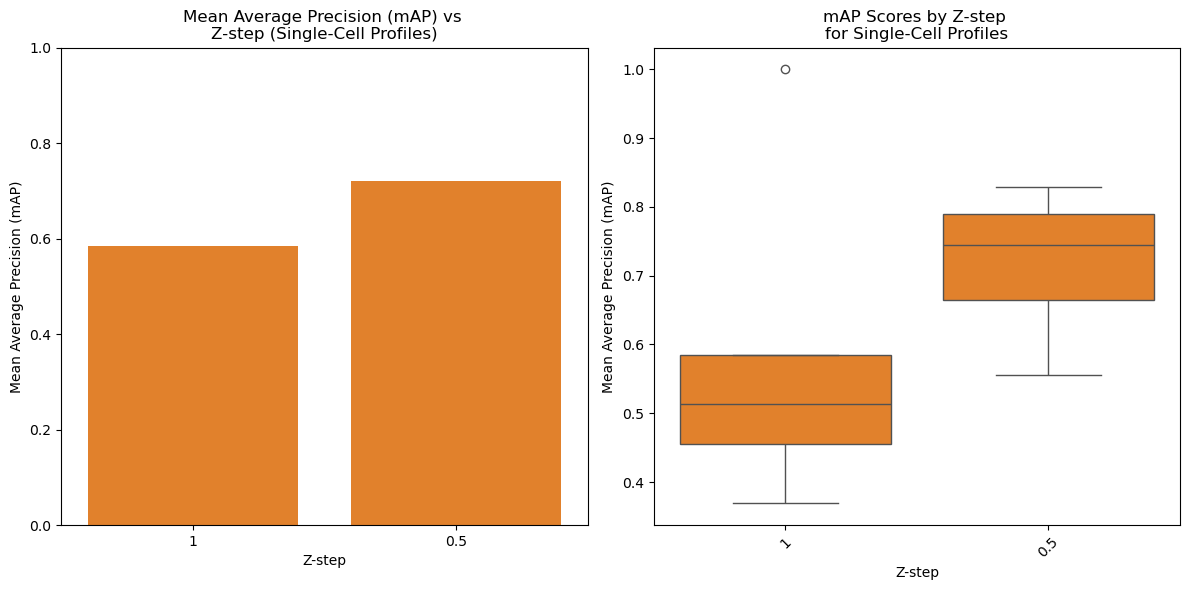

In [8]:
# plot the mAP scores against the convolution values
activity_map["Metadata_zstep"] = activity_map["Metadata_zstep"].astype(str)
activity_sc_ap["Metadata_zstep"] = activity_sc_ap["Metadata_zstep"].astype(str)

# sort z-steps by float value for proper ordering
zstep_order = sorted(
    activity_map["Metadata_zstep"].unique(), key=lambda x: float(x), reverse=True
)

# create custom palette where 0.5 and 0.2 share the same color across both plots
custom_palette = {}
colors = plt.cm.tab10(np.linspace(0, 1, 10))
color_idx = 0
for z in zstep_order:
    if z == "0.5":
        custom_palette[z] = colors[1]
    elif z == "1":
        custom_palette[z] = colors[1]  # same as 0.5
    else:
        custom_palette[z] = colors[color_idx]
        color_idx += 1

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(
    data=activity_map,
    x="Metadata_zstep",
    y="mean_average_precision",
    hue="Metadata_zstep",
    palette=custom_palette,
    order=zstep_order,
)
plt.title("Mean Average Precision (mAP) vs \nZ-step (Single-Cell Profiles)")
plt.xlabel("Z-step")
plt.ylabel("Mean Average Precision (mAP)")
plt.ylim(0, 1)
plt.legend([], frameon=False)

plt.subplot(122)
sns.boxplot(
    data=activity_sc_ap,
    x="Metadata_zstep",
    y="average_precision",
    order=zstep_order,
    palette=custom_palette,
)
plt.xlabel("Z-step")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores by Z-step \nfor Single-Cell Profiles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(figure_dir / "sc_zstep_0.2_vs_allmap.png", dpi=600, bbox_inches="tight")
plt.show()

## Compute distance for all z-step changed profiles

In [9]:
organoid_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/organoid_fs_zstep_profiles.parquet"
).resolve()
sc_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/sc_fs_zstep_profiles.parquet"
).resolve()

sc_df = pd.read_parquet(sc_profile_path)
organoid_df = pd.read_parquet(organoid_profile_path)  # replace with organoid path

figure_dir = pathlib.Path(
    f"{root_dir}/7.technical_analysis/figures/zstep_profile_analysis"
).resolve()
figure_dir.mkdir(parents=True, exist_ok=True)

In [11]:
sc_df.head()


sc_df_1 = sc_df[sc_df["Metadata_zstep"] == "1"]
sc_df_0_5 = sc_df[sc_df["Metadata_zstep"] == "0.5"]
sc_df_0_2 = sc_df[sc_df["Metadata_zstep"] == "0.2"]
print(sc_df_1.shape, sc_df_0_5.shape, sc_df_0_2.shape)

(5, 5693) (46, 5693) (41, 5693)
